In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [3]:
a = [2.1, 2.8, 3.4, 4.1, 5.0, 7.1]
b = [1.9, 2, 3.5, 4.0, 5.5, 6.2]

<IPython.core.display.Javascript object>


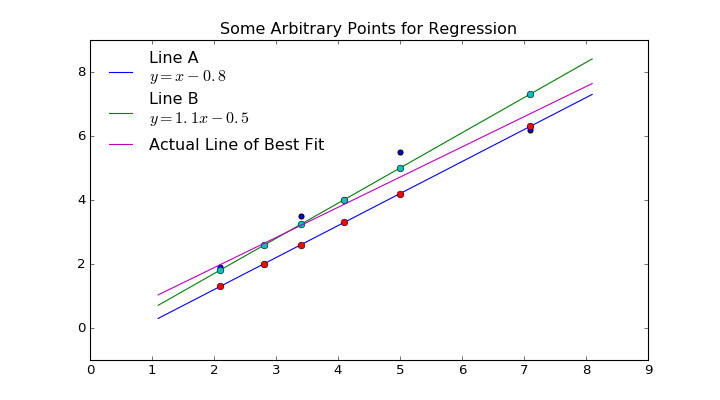

In [4]:
plt.figure(figsize=(9,5))
plt.scatter(a,b)
plt.title("Some Arbitrary Points for Regression")

In [5]:
def line_a(x):
    return 1.0*x -0.8

def line_b(x):
    return 1.1*x -0.5

In [6]:
x = np.linspace(min(a)-1, max(a)+1, 100)
plt.plot(x, line_a(x), label = 'Line A \n$y = x - 0.8$')
plt.plot(x, line_b(x), label = 'Line B \n$y = 1.1x - 0.5$')
plt.legend(frameon=False, loc = 'upper left')

### How Far from the Lines are Data?

We will evaluate the equations for `line_a` and `line_b` with a list comprehension that substitutes the values from list `a` into our functions.

In [7]:
predict_a = [line_a(i) for i in a]

In [8]:
predict_b = [line_b(i) for i in a]

In [9]:
predict_a

[1.3, 1.9999999999999998, 2.5999999999999996, 3.3, 4.2, 6.3]

In [10]:
predict_b

[1.8100000000000005, 2.58, 3.24, 4.01, 5.0, 7.3100000000000005]

In [11]:
plt.plot(a, predict_a, 'o')
plt.plot(a, predict_b, 'o')

#### Residuals

Our residuals were distances from the predicted values to the actual data values.  For example, at the $x$ coordinate 2.1 maps to 1.3 in `line_a` and 1.8 with `line_b`.  Because our data value here is 1.9, we see that `line_b` is much closer to this point, and thereby a better predictor.  We want to test all the points however, and determine our residuals.

In [12]:
line_a(a[0])

1.3

In [13]:
line_b(a[0])

1.8100000000000005

In [14]:
resid_a = [(b[i]- predict_a[i])**2 for i in range(len(a))]

In [15]:
resid_b = [(b[i]- predict_b[i])**2 for i in range(len(a))]

In [16]:
resid_a

[0.3599999999999998,
 4.930380657631324e-32,
 0.8100000000000006,
 0.49000000000000027,
 1.6899999999999995,
 0.009999999999999929]

In [17]:
resid_b

[0.008099999999999894,
 0.3364000000000001,
 0.06759999999999988,
 9.999999999999574e-05,
 0.25,
 1.2321000000000006]

#### RMSE

Now we want to find the square root of the sum of residuals.  The line with the smallest value will be our line of best fit.

In [18]:
RMSE_a = np.sqrt(sum(resid_a))

In [19]:
RMSE_b = np.sqrt(sum(resid_b))

In [20]:
RMSE_a

1.833030277982336

In [21]:
RMSE_b

1.3763357148602955

In [22]:
slope, intercept = np.polyfit(a, b, 1)

In [23]:
def lbf(x):
    return slope*x + intercept

In [24]:
plt.plot(x, lbf(x), label = 'Actual Line of Best Fit')
plt.legend(frameon=False, loc='upper left')

#### Example 2

![](images/regression_ex.png)

In [25]:
temp = [0, 4, 10, 15, 21, 29, 36, 51, 68]
solubility = [66.7, 71.0, 76.3, 80.6, 85.7, 92.9, 99.4, 113.6, 125.1]

<IPython.core.display.Javascript object>


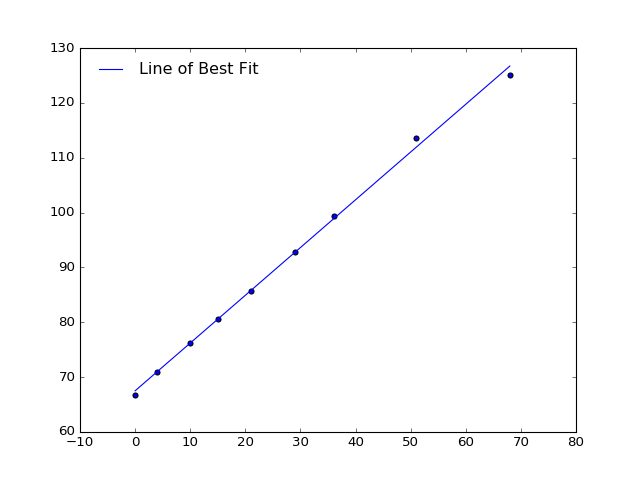

In [26]:
plt.figure()
plt.scatter(temp, solubility)

In [27]:
slope, intercept = np.polyfit(temp, solubility, 1)
print("The slope of our line of best fit is ", slope, "and intercept is ", intercept)

The slope of our line of best fit is  0.870640394089 and intercept is  67.5077941981


In [28]:
x = np.linspace(min(temp), max(temp), 1000)
plt.plot(x, slope*x + intercept, label = "Line of Best Fit")
plt.legend(frameon=False, loc = 'best')

In [29]:
from scipy import stats
slope, intercept, correlation, p, error = stats.linregress(temp, solubility)
print("With the stats library, we get: \nSlope = ", slope, "\nIntercept = ", intercept, "\nCorrelation Coefficient = ", correlation)

With the stats library, we get: 
Slope =  0.870640394089 
Intercept =  67.5077941981 
Correlation Coefficient =  0.998954934734


#### Generating some Random Values

In [30]:
np.random.seed(12345678)
x = np.random.random(100)
y = np.random.random(100)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [31]:
slope, intercept, r_value

(-0.12135539338460188, 0.55166750346823656, -0.11769916393712773)

<IPython.core.display.Javascript object>


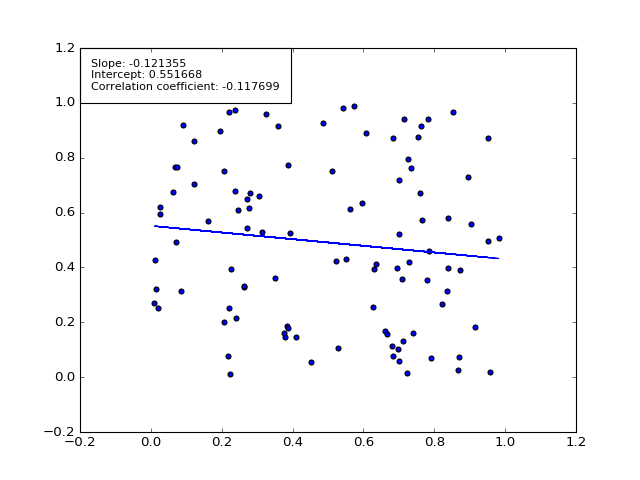

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(x, y)
plt.plot(x, slope*x + intercept)

text_string = "Slope: %f" % (slope)
text_string += "\nIntercept: %f" % (intercept)
text_string += "\nCorrelation coefficient: %f" % (r_value)
ax.text(0.022, 0.972, text_string, transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='none', pad=10), fontsize=10)